In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
def find_g(p1, p2, p3, p4, p5, X0, T, step=1):
    g = [p5]
    x = [X0]
    
    for _ in range(int(T * step)):
        dg_dt = p1 * g[-1] + p2 * x[-1] + p3
        dx_dt = g[-1] + p4 * x[-1]
        
        g.append(g[-1] + dg_dt / step)
        x.append(x[-1] + dx_dt / step)
        
    return np.array(g), np.array(x)

In [3]:
# p1 = 1.87 / 100
p1 = -0.05
p2 = -1.25 / 100
p3 = 9.21
p4 = -1.97 / 10

p5 = 150
X0 = 80

In [4]:
step = 100
T = 60
G, X = find_g(p1, p2, p3, p4, p5, X0, T, step)

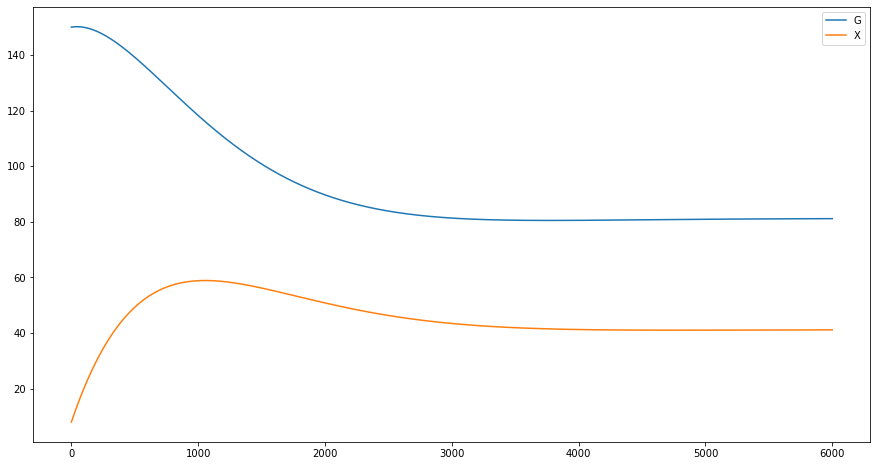

In [5]:
plt.figure(figsize=(15, 8))
plt.plot(G, label='G')
plt.plot(X/10, label='X')
plt.legend()

We got equations: 
$$
\begin{cases}
\frac{dG}{dt} = p_1 G + p_2 X + p_3 \\
\frac{dX}{dt} = G + p_4 X
\end{cases}
$$

In [7]:
def get_params(p4, G, X0, step):
    X_ = [X0]
    
    #find X
    for g in G[:-1]:
        dx_dt = g + p4 * X_[-1]
        X_.append(X_[-1] + dx_dt / step)
    
    #find p1, p2, p3
    Y = (G[1:] - G[:-1]) * step
    Z = np.vstack([G[:-1], X_[:-1]]).T
    
    model = LinearRegression().fit(Z[:], Y[:])
    y_pred = model.predict(Z[:])
    
    print(r2_score(y_pred, Y))
    
    return model.coef_, model.intercept_

In [42]:
res = []
for p4_ in np.arange(0.5, 2, 0.01) * p4:
    [p1_, p2_], p3_ = get_params(p4_, G[::step], X0, 1)
    res.append([p1_, p2_, p3_, p4_])
res = np.array(res)

0.987161767229491
0.9874352017717664
0.9877466356007825
0.9880902568308764
0.9884607924760495
0.9888534675756572
0.9892639652179207
0.9896883882664654
0.9901232232519059
0.990565306660079
0.9910117936957511
0.9914601295012966
0.99190802274721
0.9923534214738062
0.9927944910429992
0.9932295940500595
0.9936572720438267
0.9940762289073158
0.9944853157571443
0.9948835172284326
0.9952699390209445
0.9956437965916375
0.9960044048881194
0.996351169026501
0.9966835758256646
0.9970011861179365
0.9973036277635434
0.9975905893030251
0.997861814187994
0.9981170955362992
0.9983562713628001
0.9985792202416217
0.9987858573599863
0.9989761309275326
0.9991500189084811
0.9993075260471123
0.999448681159832
0.9995735346696285
0.9996821563610059
0.9997746333355428
0.9998510681500763
0.9999115771211917
0.9999562887812119
0.9999853424722435
0.9999988870660766
0.9999970797988471
0.9999800852103808
0.9999480741790553
0.9999012230438353
0.9998397128058952
0.999763728402911
0.9996734580497272
0.9995690926396597
0

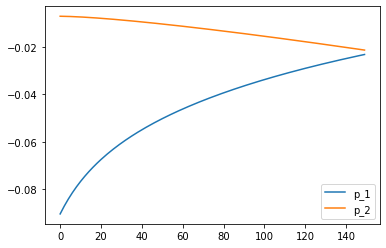

In [47]:
plt.plot(res[:, 0], label='p_1')
plt.plot(res[:, 1], label='p_2')
# plt.plot(res[:, 3], label='p_4')
plt.legend()

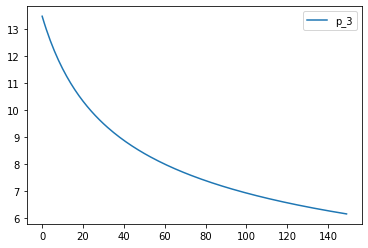

In [46]:
plt.plot(res[:, 2], label='p_3')
plt.legend()

In [19]:
get_params(p4 * 2, G[::step], X0, 1)

0.9472543654276978


(array([-0.02310542, -0.0215627 ]), 6.127926168570703)

In [20]:
p1, p2, p3

(-0.05, -0.0125, 9.21)

## TODO
1) Find limit value of G theoretically (by equation)

2) Tune p_1 (0-6) so that it fits limit value 

3) Do 1) for all models

## Task 1

If exists limit for G and X, let's call them $\hat{G}$ and $\hat{X}$. Then we have following equations:
$$
\begin{cases}
p_1 \hat{G} + p_2 \hat{X} + p_3 = 0 \\
\hat{G} + p_4 \hat{X} = 0
\end{cases}
$$
One could solve it:
$$
\begin{cases}
\hat{X} = \frac{p_3}{p_1 p_4 - p_2} \\
\hat{G} = \frac{-p_3 p_4}{p_1 p_4 - p_2}
\end{cases}
$$

Let's find $\hat{G}$:

In [7]:
-p3 * p4 / (p1 * p4 - p2)

205.80188518732774

## Task 2

We can find proper $p_1$, so that $\lim{G}=80$:

In [8]:
p2 / p4 - p3 / 80

-0.051673223350253816